In [1]:
# 定义超参数
EPOCHS = 2000   # 训练次数
ALPHA = 0.005   # 学习率

In [2]:
# 加载数据集
import h5py
train_set = h5py.File("./datasets/train_catvnoncat.h5","r")
test_set = h5py.File("./datasets/test_catvnoncat.h5","r")

for key in train_set.keys():  # 查看训练集结构
    print(key)   # train_set_x  train_set_y
train_set['train_set_x'].shape # (209, 64, 64, 3) 有209张图片，图片分辨率64*64，颜色通道为3
train_set['train_set_y'].shape # (209,) 标注图片标签（是否为猫）

for key in test_set.keys():  # 查看测试集结构
    print(key)    # test_set_x   test_set_y
test_set['test_set_x'].shape # (50, 64, 64, 3) 有50张图片，图片分辨率64*64，颜色通道为3 
test_set['test_set_y'].shape # (50,) 标注图片标签（是否为猫）

# 将数据集中的内容和标签分开
train_data_org = train_set['train_set_x'][:]  # 保存的是训练集里面的图像数据，即209张64x64的3通道图像
train_labels_org = train_set['train_set_y'][:] # 保存的是训练集的图像对应的分类值，其中0表示不是猫，1表示是猫
test_data_org = test_set['test_set_x'][:] # 保存的是测试集里面的图像数据，即50张64x64的3通道图像
test_labels_org = test_set['test_set_y'][:] # 保存的是测试集里面的图像对应的分类值，其中0表示不是猫，1表示是猫

list_classes
train_set_x
train_set_y
list_classes
test_set_x
test_set_y


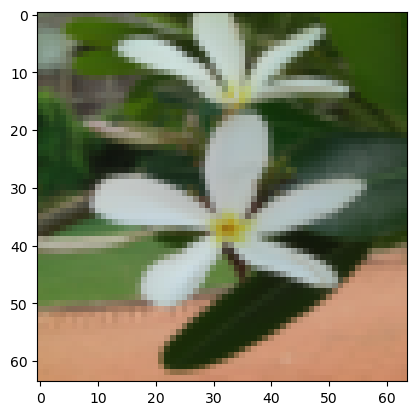

In [3]:
# 查看图片
import matplotlib.pyplot as plt
%matplotlib inline  
plt.imshow(train_data_org[176])

In [4]:
# 处理数据集------维度处理
# 对于训练集样本：(209, 64, 64, 3) ----> (12288, 209) 
# 对于测试集样本：(50, 64, 64, 3) ----->(12288, 50)
m_train = train_data_org.shape[0] # 训练集个数
m_test = test_data_org.shape[0] # 测试集个数
train_data_trans = train_data_org.reshape(m_train,-1).T # 训练集维度处理
test_data_trans = test_data_org.reshape(m_test,-1).T # 测试集维度处理
print(train_data_org.shape,test_data_org.shape)
print(train_data_trans.shape,test_data_trans.shape)

import numpy as np
# 对于训练集标签：(209,) ----> (1, 209)
# 对于测试集标签：(50,) -----> (1, 50)
train_labels_trans = train_labels_org.reshape(1,m_train) # 训练集标签维度处理
test_labels_trans = test_labels_org.reshape(1,m_test) # 训练集标签维度处理
print(train_labels_org.shape,test_labels_org.shape)
print(train_labels_trans.shape,test_labels_trans.shape)

(209, 64, 64, 3) (50, 64, 64, 3)
(12288, 209) (12288, 50)
(209,) (50,)
(1, 209) (1, 50)


In [5]:
# 处理数据集------标准化数据
train_data_norm = train_data_trans / 255
test_data_norm = test_data_trans / 255
print(train_data_trans)
print(train_data_norm)

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]
[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


In [6]:
# 初始化参数
n_dim = train_data_norm.shape[0]
w = np.zeros((n_dim,1))
b = 0

# 定义前向传播
def propagate(w,b,x,y):
    Z = np.dot(w.T,x)+b
    A = 1/(1 + np.exp(-Z))
    
    # 代价函数
    m = x.shape[1]
    J = -1/m * np.sum(y * np.log(A) + (1-y) * np.log(1-A))
    
        # 梯度下降
    dw = 1/m * np.dot(x,(A-y).T)
    db = 1/m * np.sum(A-y)
    
    grands = {'dw':dw,'db':db}
    
    return grands,J

In [7]:
# 优化器
def optimize(w,b,X,y):
    costs = []
    for i in range(EPOCHS):
        grands, J = propagate(w,b,X,y)
        dw = grands['dw']
        db = grands['db']
        w = w - ALPHA * dw
        b = b - ALPHA * db
        
        if i%100 == 0:
            costs.append(J)
            print("迭代次数为：",i,"损失是：",J)
    
    grands = {'dw':dw,'db':db}
    parameters = {'w':w,'b':b}
    return grands,parameters,costs

In [8]:
# 预测
def predict(w,b,X_test):
    Z = np.dot(w.T,X_test)+b
    A = 1/(1 + np.exp(-Z))
    
    m = X_test.shape[1]
    y_pred = np.zeros((1,m))
    for i in range(m):
        if A[:,i] > 0.5:
            y_pred[:,i] = 1
        else:
            y_pred[:,i] = 0
    return y_pred

In [9]:
# 模型整合
def model(w,b,x_train,y_train,x_test,y_test):
    grands,params,costs = optimize(w,b,x_train,y_train)
    w = params['w']
    b = params['b']
    y_pred_train = predict(w,b,x_train)
    y_pred_test = predict(w,b,x_test)
    print("训练集上的准确率：",np.mean(y_pred_train == y_train)*100,'%')
    print("测试集上的准确率：",np.mean(y_pred_test == y_test)*100,'%')
    
    return w,b,y_pred_train,y_pred_test,costs

In [10]:
# 调用
result = model(w,b,train_data_norm,train_labels_trans,test_data_norm,test_labels_trans)

迭代次数为： 0 损失是： 0.6931471805599453
迭代次数为： 100 损失是： 0.5845083636993086
迭代次数为： 200 损失是： 0.4669490409465546
迭代次数为： 300 损失是： 0.37600686694802077
迭代次数为： 400 损失是： 0.3314632893282512
迭代次数为： 500 损失是： 0.3032730674743829
迭代次数为： 600 损失是： 0.2798795865826048
迭代次数为： 700 损失是： 0.2600421369258757
迭代次数为： 800 损失是： 0.24294068467796612
迭代次数为： 900 损失是： 0.22800422256726066
迭代次数为： 1000 损失是： 0.21481951378449646
迭代次数为： 1100 损失是： 0.20307819060644994
迭代次数为： 1200 损失是： 0.1925442771670686
迭代次数为： 1300 损失是： 0.18303333796883509
迭代次数为： 1400 损失是： 0.17439859438448874
迭代次数为： 1500 损失是： 0.16652139705400335
迭代次数为： 1600 损失是： 0.1593045182975662
迭代次数为： 1700 损失是： 0.1526673247129651
迭代次数为： 1800 损失是： 0.14654223503982336
迭代次数为： 1900 损失是： 0.14087207570310165
训练集上的准确率： 99.04306220095694 %
测试集上的准确率： 70.0 %


Text(0, 0.5, 'cost')

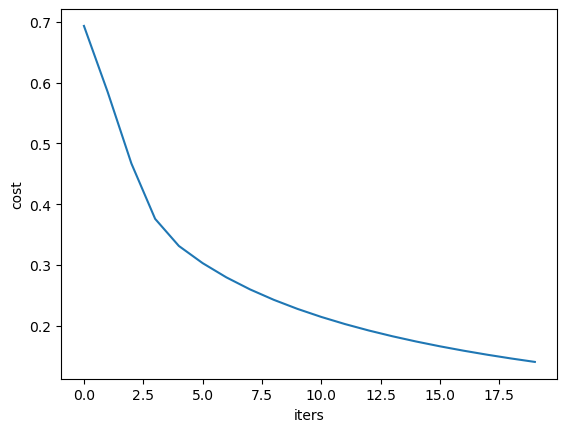

In [11]:
# 绘图
plt.plot(result[4])
plt.xlabel("iters")
plt.ylabel("cost")

y is 1
y prediction is 1.0


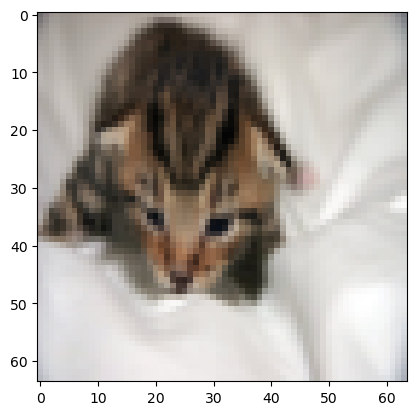

In [12]:
# 17.单幅图片的测试
index = 1
print('y is',test_labels_trans[0,index])
print('y prediction is',result[3][0,index])
plt.imshow(test_data_org[index])